# Data Wrangling

In [357]:
#dependências do projeto
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

#dataframe com as estatísticas
df = pd.read_csv('players_stats_13-02-2019.csv', sep=';', dtype=object)
#dataframe do dicionário de dados
df_dict = pd.read_csv('data_dictionary.csv', sep=';', encoding='cp1252')
#mostrar todas as colunas quando printar o dataframe
pd.options.display.max_columns = None
df.shape

(100, 169)


## Limpeza

### 1.  Retirar parênteses ( das linhas

In [358]:
columns = ['Age', 'Current_Rank', 'Best_Rank', 'Current_Elo_Rank', 'Best_Elo_Rank', 'Pick_Elo_Rank', 'Goat_Rank', 'Hard', 'Clay',
           'Grass', 'Carpet', 'Grand_Slam.1', 'Tour_Finals', 'Masters.1', 'Olympics', 'ATP_500', 'ATP_250', 'Davis_Cup', 
           'Deciding_Set', 'Fifth_Set', 'After_Winning_1st_Set', 'After_Losing_1st_Set', 'Tie-Breaks', 'Deciding_Set_Tie-Breaks',
           'Outdoor', 'Indoor', 'Best_of_3', 'Best_of_5', 'Vs_No._1', 'Vs_Top_5', 'Vs_Top_10', 'Vs_Top_20', 'Vs_Top_50',
           'Vs_Top_100', 'Final', 'For_Bronze_Medal', 'Semi-Final', 'Quarter-Final', 'Round_of_16', 'Round_of_32', 'Round_of_64',
           'Round_of_128', 'Round-Robin', 'Very_Fast', 'Fast', 'Medium_Fast', 'Medium', 'Medium_Slow', 'Slow', 'Very_Slow',
           'Best_of_3:_2:0', 'Best_of_3:_2:1', 'Best_of_3:_1:2', 'Best_of_3:_0:2', 'Best_of_5:_3:0', 'Best_of_5:_3:1', 
           'Best_of_5:_3:2', 'Best_of_5:_2:3', 'Best_of_5:_1:3', 'Best_of_5:_0:3']

for column in columns:
    df[column] = df[column].str.split('(')
    df[column] = df[column].str[0]

### 2. Retirar porcentagem % das colunas

In [359]:
for column in df:
    if (df[column].dtype == np.object):    
        df[column] = df[column].str.replace('%', '')
        df[column] = df[column].str.strip()

### 3. Retirar 'kg' da coluna Height e 'cm' da coluna Weight

In [360]:
df['Height'] = df['Height'].str.replace('kg', '')
df['Weight'] = df['Weight'].str.replace('cm', '')

### 4. Drop de colunas Active e Seasons
Motivo: Seasons está NaN para todas / Active está YES para todos

In [361]:
df.drop(columns=['Seasons', 'Active'], inplace=True)

### 5. Converter coluna Prize Money para número inteiro
Exemplo: Entrada *US$ 125,772,589 All-time leader in earnings* | Saída 

In [362]:
#remove moeda
df['Prize_Money'] = df['Prize_Money'].str.split('$')
df['Prize_Money'] = df['Prize_Money'].str[1]
#remove espaço do inicio
df['Prize_Money'] = df['Prize_Money'].str.lstrip()
#divide entre número e anotações
df['Prize_Money'] = df['Prize_Money'].str.split(' ')
df['Prize_Money'] = df['Prize_Money'].str[0]
#remove vírgula
df['Prize_Money'] = df['Prize_Money'].str.replace(',', '')

In [363]:
df.head(5)

,Player_id,Player,Age,Country,Height,Weight,Plays,Backhand,Turned_Pro,Prize_Money,Titles,Grand_Slam,Masters,Finals,Current_Rank,Best_Rank,Current_Elo_Rank,Best_Elo_Rank,Pick_Elo_Rank,Goat_Rank,Hard,Clay,Grass,Carpet,Grand_Slam.1,Tour_Finals,Masters.1,Olympics,ATP_500,ATP_250,Davis_Cup,Deciding_Set,Fifth_Set,After_Winning_1st_Set,After_Losing_1st_Set,Tie-Breaks,Deciding_Set_Tie-Breaks,Outdoor,Indoor,Best_of_3,Best_of_5,Vs_No._1,Vs_Top_5,Vs_Top_10,Vs_Top_20,Vs_Top_50,Vs_Top_100,Final,For_Bronze_Medal,Semi-Final,Quarter-Final,Round_of_16,Round_of_32,Round_of_64,Round_of_128,Round-Robin,Very_Fast,Fast,Medium_Fast,Medium,Medium_Slow,Slow,Very_Slow,Best_of_3:_2:0,Best_of_3:_2:1,Best_of_3:_1:2,Best_of_3:_0:2,Best_of_5:_3:0,Best_of_5:_3:1,Best_of_5:_3:2,Best_of_5:_2:3,Best_of_5:_1:3,Best_of_5:_0:3,Break_Points_Ratio,Tie-Breaks_per_Match,Points_Dominance,Return_Games_Won_%,Point_Time_(seconds),BPs_per_Return_Game,DFs_per_Svc._Game,Points_per_Service_Game,Pts._Lost_per_Svc._Game,Opponent_Elo_Rating,Ace_%,Set_Time_(minutes),BPs_Faced_per_Match,Game_Time_(minutes),Break_Points_Won_%,Service_Games_Won_%,Tie-Breaks_per_Set_%,Pts._Won_per_Rtn._Game,Opponent_Rank,Points_per_Match,DFs_per_Set,Pts._to_Matches_Over-Perf.,Upsets_against,Svc._Gms._Lost_per_Match,Total_Points_Won_%,BPs_Faced_per_Set,Upsets,Rtn._In-play_Pts._Won_%,1st_Srv._Return_Won_%,BPs_per_Set,Aces_per_Match,Double_Fault_%,Aces_per_Svc._Game,Sets_Won,DFs_per_2nd_Serve_%,Rtn._Gms._Won_per_Set,Double_Fault_Against_%,BPs_per_Svc._Game,BPs_Saved_Over-Perf.,2nd_Srv._Return_Won_%,Matches_Played,Upsets_against_%,Match_Time,Double_Faults_Against,Upsets_scored_%,Svc._In-play_Pts._Won_%,Break_Points_Saved_%,Gms._to_Sets_Over-Perf.,BPs_Over-Performing,Total_Games_Won,Svc._Gms._Lost_per_Set,Aces_/_DFs_Ratio,Pts._to_Gms._Over-Perf.,Gms._to_Matches_Ov.-Perf.,BPs_per_Match,Tie-Breaks_Won_%,Rtn._Gms._Won_per_Match,Aces,Aces_per_Set,2nd_Serve_Won_%,Sets_Won_%,Rtn._to_Svc._Points_Ratio,BPs_Conv._Over-Perf.,Points_per_Return_Game,Service_Points_Won_%,Total_Points_Played,Upsets_%,Upsets_scored,Games_per_Match,Double_Faults,1st_Serve_%,Sets_Played,Total_Games_Played,Points_per_Game,Ace_Against,Games_Dominance,1st_Serve_Won_%,Games_Won_%,DFs_per_Match,Tie-Breaks_Won,S._Pts._to_S._Gms._Ov.-Perf.,Matches_Won_%,Points_per_Set,Total_Points_Won,R._Pts._to_R._Gms._Ov.-Perf.,Sets_to_Matches_Ov.-Perf.,Return_Points_Won_%,Tie-Breaks_Played,Matches_Won,Pts._to_Sets_Over-Perf.,Pts._to_TBs._Over-Perf.,Ace_Against_%,Games_per_Set,Sets_per_Match
0,4920,Novak Djokovic,31,Serbia,77,188,Right-handed,Two-handed,2003,125772589,73,15,32,5,1,1,1,1,2629,2,84.3,79.4,83.0,69.2,86.6,74.5,82.0,69.2,85.7,77.2,81.6,74.3,76.3,96.1,42.5,63.3,71.4,83.9,76.5,81.2,86.0,43.3,60.3,68.8,72.2,79.0,81.8,68.6,50.0,72.7,82.5,87.2,90.1,86.8,94.8,74.3,83.1,81.9,82.8,86.4,83.7,73.8,75.7,60.0,21.5,7.6,11.0,57.9,20.4,9.0,2.8,5.0,5.0,1.28,0.36,1.28,32.2,41.6,0.73,0.18,6.18,2.03,2044,7.0,42.0,5.2,4.45,44.2,85.7,13.7,2.80,23,158.2,0.86,1.52,121,1.8,54.4,1.98,179,42.8,33.6,3.38,5.4,2.9,0.43,2041,8.3,1.49,3.5,0.41,0.98,55.2,1022,11.9,01:49,2769,5.7,66.7,65.4,1.28,0.96,15036,0.68,2.39,1.09,1.40,8.8,63.3,3.9,5296,2.06,55.5,75.8,1.05,1.05,6.65,67.1,155526,17.5,58,24.8,2212,64.9,2693,25396,6.41,4948,2.25,73.4,59.2,2.3,233,1.28,82.8,60.4,84535,0.76,1.09,42.2,368,846,1.39,1.16,6.2,9.43,2.64
1,4742,Rafael Nadal,32,Spain,85,185,Left-handed,Two-handed,2001,,80,17,33,NaN,2,1,2,1,2552,3,77.4,92.0,77.6,25.0,87.2,55.2,82.5,83.3,87.2,74.1,96.0,68.6,65.6,95.0,42.8,61.0,52.9,84.8,65.4,80.9,87.9,51.4,59.7,65.3,71.6,77.5,82.0,68.4,0.0,76.3,76.6,88.9,89.4,88.7,96.4,63.6,73.7,77.1,77.3,85.2,89.8,93.2,94.2,63.9,17.4,7.8,11.0,63.7,18.0,6.8,3.5,3.9,4.2,1.34,0.33,1.30,33.3,44.9,0.74,0.13,6.12,2.00,2020,4.1,44.4,5.1,4.75,44.9,85.6,13.1,2.79,27,150.5,0.62,1.52,141,1.7,54.4,2.01,195,43.7,34.2,3.46,3.0,2.2,0.25,2198,6.9,1.55,3.4,0.43,0.99,55.3,1114,12.7,01:52,2905,4.8,67.4,66.3,1.30,0.97,15842,0.68,1.87,1.10,1.39,8.8,61.0,3.9,3219,1.16,57.3,77.3,1.07,1.06,6.57,67.2,163919,17.5

### 6. Converter tipo de dados
Seguir dataframe contendo o dicionário de dados

In [364]:
df_dict = df_dict.rename(columns={'Tipo de Dados': 'data_type'})

df = df.replace(np.nan, '0')
df = df.replace('', '0')
for index, row in df_dict.iterrows():
    if row.data_type == 'int':
        df[row.Atributo] = df[row.Atributo].astype('int')
    elif row.data_type == 'float':
        df[row.Atributo] = df[row.Atributo].astype('float')

### 7. Converter tempo pora minutos na  coluna Point_Time_(seconds)

In [365]:
df['Point_Time_(seconds)'] = df['Point_Time_(seconds)']/60

### 8. Converter tempo para minutos na coluna Match_Time

In [366]:
#recebe horas no formato hh:mm
def hours_to_minutes(hours):
    if hours == '0':
        return float(0)
    else:
        hour, minute = hours.split(':')
        hour = hour.strip()
        minute = minute.strip()
    return (int(hour)*60)+int(minute)

df['Match_Time'] = df['Match_Time'].map(lambda time: hours_to_minutes(time))

## Tratamento

### 1. Tratar missing values da coluna Weight

Substituir pela média

In [367]:
#verifica informações de de onde o dado está presente
df[df['Weight'] != 0].Weight.describe()

count     63.000000
mean     187.111111
std        7.804282
min      163.000000
25%      183.000000
50%      188.000000
75%      190.000000
max      208.000000
Name: Weight, dtype: float64

In [368]:
df[df['Weight'] ==  0].Weight = df[df['Weight'] !=  0].Weight.mean()

/Users/suzana/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


### 2. Tratar missing values da coluna Height

In [369]:
#verifica informações de de onde o dado está presente
df[df['Height'] != 0].Weight.describe()

count     16.000000
mean     189.625000
std        6.354788
min      178.000000
25%      185.000000
50%      188.000000
75%      196.000000
max      198.000000
Name: Weight, dtype: float64

In [370]:
df[df['Height'] ==  0].Height = df[df['Height'] !=  0].Height.mean()

### 3. Discretizar colunas Age, Height, Weight, Plays e Backhand

#### Plays

In [371]:
df.groupby('Plays').Plays.count()

Plays
0                3
Left-handed     17
Right-handed    80
Name: Plays, dtype: int64

In [372]:
df.Plays = df.Plays.map({'Right-handed': True, 'Left-handed': False, '0': True})

#### Backhand

In [373]:
df.groupby('Backhand').Backhand.count()

Backhand
One-handed    15
Two-handed    85
Name: Backhand, dtype: int64

In [374]:
df.Backhand = df.Backhand.map({'Two-handed': True, 'One-handed': False, '0': True})

In [375]:
df.rename(columns={'Plays' : 'isRightHanded', 'Backhand': 'isBackhandTwoHands'}, inplace=True)

## Cluesterização

### 1. DBSCAN

In [408]:
df.head(5)

,Player_id,Age,Height,Weight,isRightHanded,isBackhandTwoHands,Turned_Pro,Prize_Money,Titles,Grand_Slam,Masters,Finals,Current_Rank,Best_Rank,Current_Elo_Rank,Best_Elo_Rank,Pick_Elo_Rank,Goat_Rank,Hard,Clay,Grass,Carpet,Grand_Slam.1,Tour_Finals,Masters.1,Olympics,ATP_500,ATP_250,Davis_Cup,Deciding_Set,Fifth_Set,After_Winning_1st_Set,After_Losing_1st_Set,Tie-Breaks,Deciding_Set_Tie-Breaks,Outdoor,Indoor,Best_of_3,Best_of_5,Vs_No._1,Vs_Top_5,Vs_Top_10,Vs_Top_20,Vs_Top_50,Vs_Top_100,Final,For_Bronze_Medal,Semi-Final,Quarter-Final,Round_of_16,Round_of_32,Round_of_64,Round_of_128,Round-Robin,Very_Fast,Fast,Medium_Fast,Medium,Medium_Slow,Slow,Very_Slow,Best_of_3:_2:0,Best_of_3:_2:1,Best_of_3:_1:2,Best_of_3:_0:2,Best_of_5:_3:0,Best_of_5:_3:1,Best_of_5:_3:2,Best_of_5:_2:3,Best_of_5:_1:3,Best_of_5:_0:3,Break_Points_Ratio,Tie-Breaks_per_Match,Points_Dominance,Return_Games_Won_%,Point_Time_(seconds),BPs_per_Return_Game,DFs_per_Svc._Game,Points_per_Service_Game,Pts._Lost_per_Svc._Game,Opponent_Elo_Rating,Ace_%,Set_Time_(minutes),BPs_Faced_per_Match,Game_Time_(minutes),Break_Points_Won_%,Service_Games_Won_%,Tie-Breaks_per_Set_%,Pts._Won_per_Rtn._Game,Opponent_Rank,Points_per_Match,DFs_per_Set,Pts._to_Matches_Over-Perf.,Upsets_against,Svc._Gms._Lost_per_Match,Total_Points_Won_%,BPs_Faced_per_Set,Upsets,Rtn._In-play_Pts._Won_%,1st_Srv._Return_Won_%,BPs_per_Set,Aces_per_Match,Double_Fault_%,Aces_per_Svc._Game,Sets_Won,DFs_per_2nd_Serve_%,Rtn._Gms._Won_per_Set,Double_Fault_Against_%,BPs_per_Svc._Game,BPs_Saved_Over-Perf.,2nd_Srv._Return_Won_%,Matches_Played,Upsets_against_%,Match_Time,Double_Faults_Against,Upsets_scored_%,Svc._In-play_Pts._Won_%,Break_Points_Saved_%,Gms._to_Sets_Over-Perf.,BPs_Over-Performing,Total_Games_Won,Svc._Gms._Lost_per_Set,Aces_/_DFs_Ratio,Pts._to_Gms._Over-Perf.,Gms._to_Matches_Ov.-Perf.,BPs_per_Match,Tie-Breaks_Won_%,Rtn._Gms._Won_per_Match,Aces,Aces_per_Set,2nd_Serve_Won_%,Sets_Won_%,Rtn._to_Svc._Points_Ratio,BPs_Conv._Over-Perf.,Points_per_Return_Game,Service_Points_Won_%,Total_Points_Played,Upsets_%,Upsets_scored,Games_per_Match,Double_Faults,1st_Serve_%,Sets_Played,Total_Games_Played,Points_per_Game,Ace_Against,Games_Dominance,1st_Serve_Won_%,Games_Won_%,DFs_per_Match,Tie-Breaks_Won,S._Pts._to_S._Gms._Ov.-Perf.,Matches_Won_%,Points_per_Set,Total_Points_Won,R._Pts._to_R._Gms._Ov.-Perf.,Sets_to_Matches_Ov.-Perf.,Return_Points_Won_%,Tie-Breaks_Played,Matches_Won,Pts._to_Sets_Over-Perf.,Pts._to_TBs._Over-Perf.,Ace_Against_%,Games_per_Set,Sets_per_Match
0,4920,31,77.0,188.0,True,True,2003,125772589,73,15,32,5,1,1,1,1,2629,2,84.3,79.4,83.0,69.2,86.6,74.5,82.0,69.2,85.7,77.2,81.6,74.3,76.3,96.1,42.5,63.3,71.4,83.9,76.5,81.2,86.0,43.3,60.3,68.8,72.2,79.0,81.8,68.6,50.0,72.7,82.5,87.2,90.1,86.8,94.8,74.3,83.1,81.9,82.8,86.4,83.7,73.8,75.7,60.0,21.5,7.6,11.0,57.9,20.4,9.0,2.8,5.0,5.0,1.28,0.36,1.28,32.2,0.693333,0.73,0.18,6.18,2.03,2044,7.0,42.0,5.2,4.45,44.2,85.7,13.7,2.80,23,158.2,0.86,1.52,121,1.8,54.4,1.98,179,42.8,33.6,3.38,5.4,2.9,0.43,2041,8.3,1.49,3.5,0.41,0.98,55.2,1022,11.9,109.0,2769,5.7,66.7,65.4,1.28,0.96,15036,0.68,2.39,1.09,1.40,8.8,63.3,3.9,5296,2.06,55.5,75.8,1.05,1.05,6.65,67.1,155526,17.5,58,24.8,2212,64.9,2693,25396,6.41,4948,2.25,73.4,59.2,2.3,233,1.28,82.8,60.4,84535,0.76,1.09,42.2,368,846,1.39,1.16,6.2,9.43,2.64
1,4742,32,85.0,185.0,False,True,2001,0,80,17,33,0,2,1,2,1,2552,3,77.4,92.0,77.6,25.0,87.2,55.2,82.5,83.3,87.2,74.1,96.0,68.6,65.6,95.0,42.8,61.0,52.9,84.8,65.4,80.9,87.9,51.4,59.7,65.3,71.6,77.5,82.0,68.4,0.0,76.3,76.6,88.9,89.4,88.7,96.4,63.6,73.7,77.1,77.3,85.2,89.8,93.2,94.2,63.9,17.4,7.8,11.0,63.7,18.0,6.8,3.5,3.9,4.2,1.34,0.33,1.30,33.3,0.748333,0.74,0.13,6.12,2.00,2020,4.1,44.4,5.1,4.75,44.9,85.6,13.1,2.79,27,150.5,0.62,1.52,141,1.7,54.4,2.01,195,43.7,34.2,3.46,3.0,2.2,0.25,2198,6.9,1.55,3.4,0.43,0.99,55.3,1114,12.7,112.0,2905,4.8,67.4,66.3,1.30,0.97,15842,0.68,1.87,1.10,1.39,8.8,61.0,3.9,3219,1.16,57.3,77.3,1.07,1.06,6.57,67.2,163919,17.5,54,23.8,1717,68.6,2843,26544,6.34,6114,2.31,71.8

In [410]:
df_cluster = df[['Age', 'Height', 'isRightHanded', 'isBackhandTwoHands', 'Prize_Money', 'Titles', 'Grand_Slam', 'Masters',
                'Finals', 'Current_Rank', 'Best_Rank', 'Grand_Slam.1', 'Tour_Finals', 'Masters.1', 'Olympics', 'ATP_500',
                'ATP_250', 'Davis_Cup']]

In [411]:
db = DBSCAN(min_samples=2).fit(df_cluster)

In [376]:
df.select_dtypes(include='object').columns

Index(['Player', 'Country'], dtype='object')

In [377]:
df.drop(columns=['Player', 'Country'], inplace=True)

In [412]:
db.core_sample_indices_ 

array([], dtype=int64)

In [413]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [402]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print(components_)

0


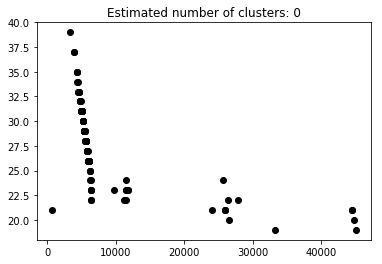

In [385]:
X = df

import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Save Dataset